In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_excel('dataset.xlsx')
dataset['Total_Crime'] = dataset.iloc[:,1:].sum(axis=1)
dataset

,State,2019,2020,2021,Total_Crime
0,Andra Pradesh,119229,188997,179611,487837
1,Arunachal Pradesh,2590,2244,2626,7460
2,Assam,123512,111558,119883,354953
3,Bihar,197935,194698,186006,578639
4,Chhattisgarh,61256,65216,70519,196991
5,Delhi,299475,249192,291904,840571
6,Goa,2465,3393,2099,7957
7,Gujarat,139503,381849,273056,794408
8,Haryana,111323,103276,112720,327319
9,Himachal Pradesh,14480,14803,13041,42324


In [3]:
q_25 = dataset.Total_Crime.quantile(0.25)
q_75 = dataset.Total_Crime.quantile(0.75)
print(q_25)
print(q_75)



13479.0
578639.0


In [4]:
Label = []
for p in dataset.iloc[:,4]:
  if p>q_75:
    Label.append('High')
  elif p<q_25:
    Label.append('Low')
  else:
    Label.append('Average')

dataset['Label'] = Label
print(dataset)

                State    2019    2020    2021  Total_Crime    Label
0       Andra Pradesh  119229  188997  179611       487837  Average
1   Arunachal Pradesh    2590    2244    2626         7460      Low
2               Assam  123512  111558  119883       354953  Average
3               Bihar  197935  194698  186006       578639  Average
4        Chhattisgarh   61256   65216   70519       196991  Average
5               Delhi  299475  249192  291904       840571     High
6                 Goa    2465    3393    2099         7957      Low
7             Gujarat  139503  381849  273056       794408     High
8             Haryana  111323  103276  112720       327319  Average
9    Himachal Pradesh   14480   14803   13041        42324  Average
10          Jharkhand   50048   51033   47684       148765  Average
11          Karnataka  120165  106350  115728       342243  Average
12             Kerala  175810  149099  142643       467552  Average
13     Madhya Pradesh  246470  283881  304066   

In [5]:
High_Mean = np.mean(dataset.loc[dataset['Label']=='High'],axis=0)
High_SD = np.std(dataset.loc[dataset['Label']=='High'],axis=0)

Average_Mean = np.mean(dataset.loc[dataset['Label']=='Average'],axis=0)
Average_SD = np.std(dataset.loc[dataset['Label']=='Average'],axis=0)

print(High_Mean)
print(Average_Mean)

InterClass_Spread = np.linalg.norm(High_Mean - Average_Mean)
print(InterClass_Spread)




2019           253297.857143
2020           392718.285714
2021           304507.571429
Total_Crime    950523.714286
dtype: float64
2019            93849.933333
2020            97013.333333
2021            98847.400000
Total_Crime    289710.666667
dtype: float64
769308.1627575468


c:\Users\harsh\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3472: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
c:\Users\harsh\AppData\Local\Programs\Python\Python39\lib\site-packages\numpy\core\fromnumeric.py:3613: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


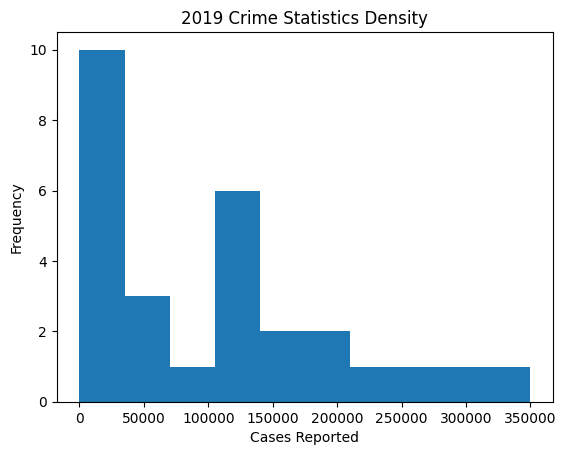

Mean:  110205.93103448275
Variance:  11458792927.352217


In [6]:
np.histogram(dataset.iloc[:,1],bins=[0,35000,70000,105000,140000,175000,210000,245000,280000,315000,350000],density=True)
plt.hist(dataset.iloc[:,1],bins=[0,35000,70000,105000,140000,175000,210000,245000,280000,315000,350000])
plt.xlabel('Cases Reported')
plt.ylabel('Frequency')
plt.title("2019 Crime Statistics Density")
plt.show()
mean_2019 = dataset.iloc[:,1].mean()
var_2019 = dataset.iloc[:,1].var()
print("Mean: ",mean_2019)
print("Variance: ",var_2019)

Minkowski Distance for r = 1: 1321018.0
Minkowski Distance for r = 2: 772378.9957009447
Minkowski Distance for r = 3: 732988.7993807108
Minkowski Distance for r = 4: 725876.7881991196
Minkowski Distance for r = 5: 724194.694728596
Minkowski Distance for r = 6: 723754.2556779656
Minkowski Distance for r = 7: 723632.8676200357
Minkowski Distance for r = 8: 723598.3208406431
Minkowski Distance for r = 9: 723588.263488001
Minkowski Distance for r = 10: 723585.2851575338


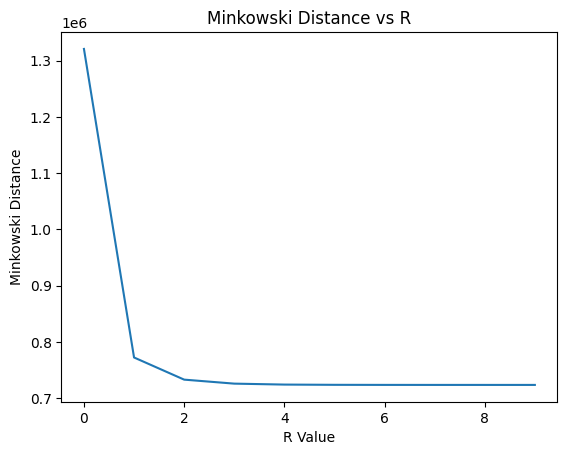

In [7]:
def minkowski_distance(a, b, p):
	return sum(abs(e1-e2)**p for e1, e2 in zip(a,b))**(1/p)
 
pl_dist = []
for i in range(1,11):
  dist = minkowski_distance(dataset.iloc[:,1], dataset.iloc[:,2], i)
  print("Minkowski Distance for r = " + str(i) + ": " + str(dist))
  pl_dist.append(dist)

plt.plot(pl_dist)
plt.xlabel("R Value")
plt.ylabel("Minkowski Distance")
plt.title("Minkowski Distance vs R")
plt.show()

0.8571428571428571
Predictions from the classifier:
['Average' 'Average' 'Low' 'Low' 'Low' 'Low' 'Average']
Target values:
['Average' 'Average' 'Low' 'Low' 'Average' 'Low' 'Average']


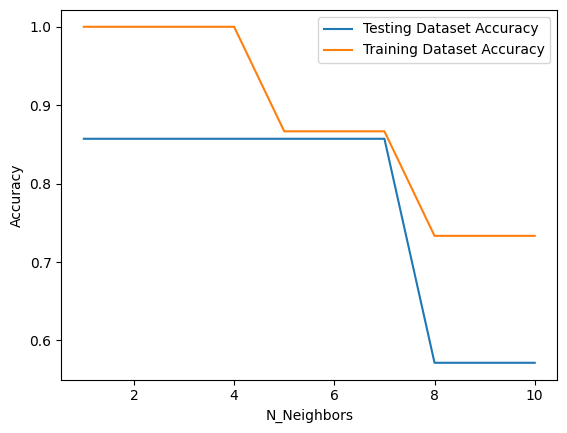

In [26]:
dataset_filtered = dataset[dataset['Label'] != 'High']
x = dataset_filtered.iloc[:,:-1].values
y = dataset_filtered.iloc[:,-1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train[:,1:-1], y_train)

print(knn.score(x_test[:,1:-1], y_test))
predicted = knn.predict(x_test[:,1:-1])
print("Predictions from the classifier:")
print(predicted)
print("Target values:")
print(y_test)

neighbors = np.arange(1, 11)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
  
for i, k in enumerate(neighbors):
    neigh = KNeighborsClassifier(n_neighbors=k)
    x=x_train[:,1:-1]
    neigh.fit(x, y_train)

    train_accuracy[i] = neigh.score(x_train[:,1:-1], y_train) 
    test_accuracy[i] = neigh.score(x_test[:,1:-1], y_test)
  
plt.plot(neighbors, test_accuracy, label = 'Testing Dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Dataset Accuracy')
  
plt.legend()
plt.xlabel('N_Neighbors')
plt.ylabel('Accuracy')
plt.show()
